In [31]:
from src.utils import construct_sparse_adj_mat
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# enzymes labeled with EC number

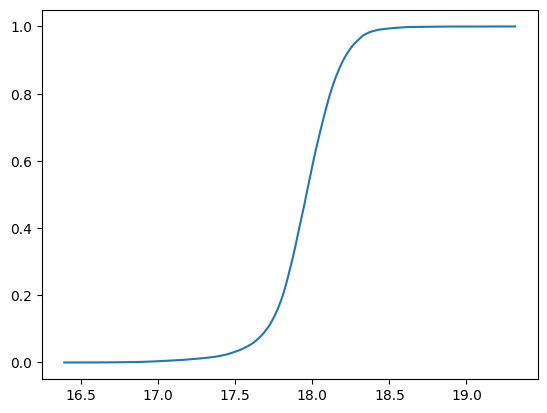

In [2]:
# Missing information in the norms?

X = np.load("/scratch/spn1560/swissprot_esm_X_unnormed.npy")

norms = np.linalg.norm(X, axis=1)
norms = sorted(norms)
ycdf = np.arange(1, len(norms)+1) / len(norms)

plt.plot(norms, ycdf)
plt.show()

del X

In [3]:
train_data_name = 'swissprot'
embed_type = 'esm'


X = np.load("/scratch/spn1560/swissprot_esm_X.npy")
y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}


Constructing swissprot sparse adjacency matrix


In [4]:
# Compute feature x feature correlation matrix

X_corr = X - X.mean(axis=0).reshape(1,-1)
X_corr /= X.std(axis=0).reshape(1,-1)
corr = (X_corr.T @ X_corr) / X_corr.shape[0]

thresh = 0.8
np.argwhere(corr - np.eye(corr.shape[0]) > thresh)

del X_corr

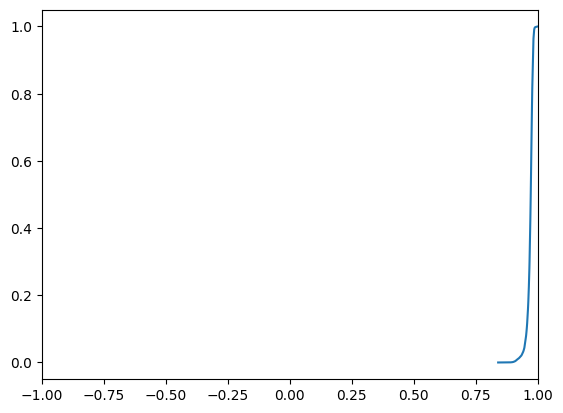

In [5]:
rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X[i, :].reshape(-1,), X[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()


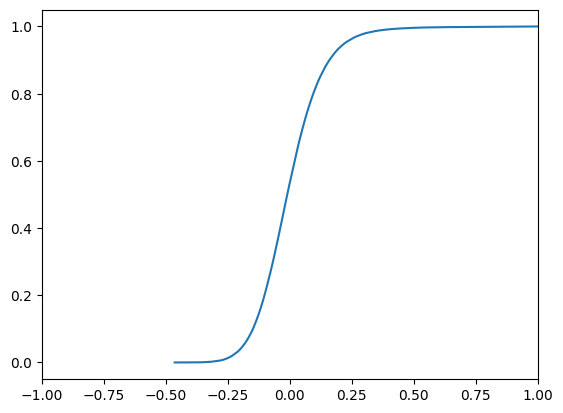

In [6]:
mu = X.mean(axis=0).reshape(1,-1)
X_demeaned = X - mu
X_demeaned /= np.linalg.norm(X_demeaned, axis=1).reshape(-1,1)

rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X_demeaned.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X_demeaned[i, :].reshape(-1,), X_demeaned[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()


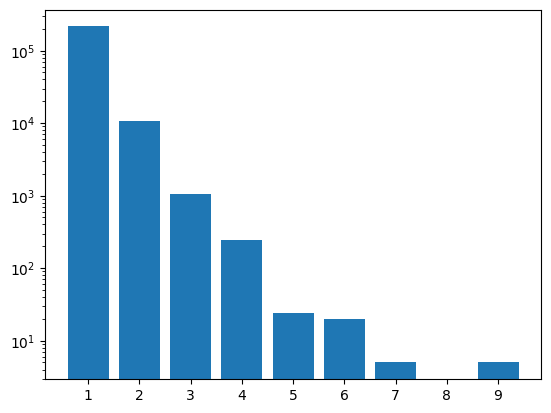

In [7]:
# Count enzyme labels with multiple filters

labels_per_prot = np.array(y.sum(axis=1)).reshape(-1,)
ct = Counter(labels_per_prot)
x, h = list(ct.keys()), list(ct.values())
plt.bar(x, h)
plt.yscale('log')
plt.xticks(np.arange(1, max(x) + 1))
plt.show()

# Enzymes labeled with imt ops

In [8]:
del X, y

train_data_name = 'sp_ops'
embed_type = 'esm'


X = np.load(f"/scratch/spn1560/{train_data_name}_esm_X.npy")
y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}

Constructing sp_ops sparse adjacency matrix


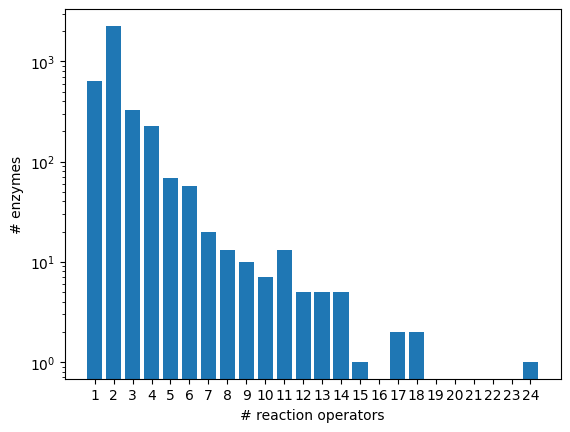

In [33]:
labels_per_prot = np.array(y.sum(axis=1)).reshape(-1,)
ct = Counter(labels_per_prot)
x, h = list(ct.keys()), list(ct.values())
plt.bar(x, h)
plt.yscale('log')
plt.xticks(np.arange(1, max(x) + 1))
plt.ylabel("# enzymes")
plt.xlabel("# reaction operators")

plt.show()

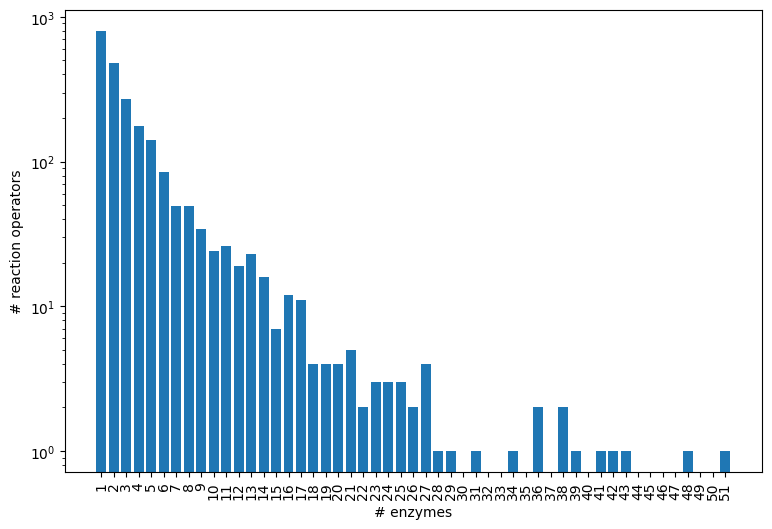

In [47]:
prots_per_label = np.array(y.sum(axis=0)).reshape(-1,)
ct = Counter(prots_per_label)
x, h = list(ct.keys()), list(ct.values())
plt.figure(figsize=(9,6))
plt.bar(x, h)
plt.yscale('log')
plt.xticks(np.arange(1, max(x) + 1))
plt.ylabel("# reaction operators")
plt.xlabel("# enzymes")
plt.xticks(rotation=90)
plt.show()

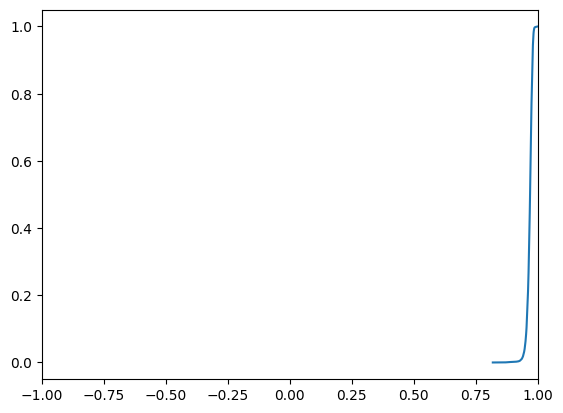

In [16]:
rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X[i, :].reshape(-1,), X[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()

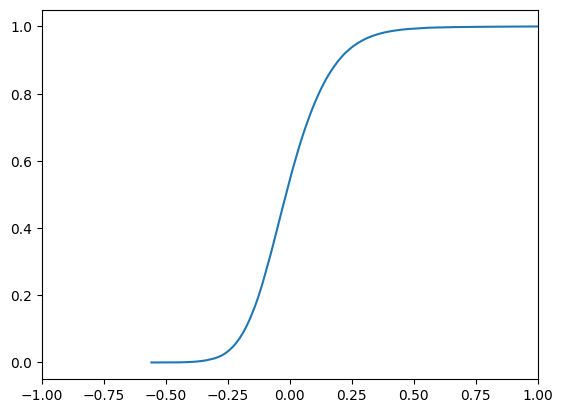

In [17]:
mu = X.mean(axis=0).reshape(1,-1)
X_demeaned = X - mu
X_demeaned /= np.linalg.norm(X_demeaned, axis=1).reshape(-1,1)

rng = np.random.default_rng(seed=1234)
n_samples = 1000
cos_sim = []
idxs = rng.choice(np.arange(X_demeaned.shape[0]), size=(n_samples,), replace=False)
for n, i in enumerate(idxs):
    for j in idxs[n+1:]:
        vec1, vec2 = X_demeaned[i, :].reshape(-1,), X_demeaned[j, :].reshape(-1,)
        cos_sim.append(np.dot(vec1, vec2))

cos_sim = sorted(cos_sim)
ycdf = np.arange(1, len(cos_sim)+1) / len(cos_sim)
plt.plot(cos_sim, ycdf)
plt.xlim(-1, 1)
plt.show()


# pca of swissprot esm embeddings

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
scratch_dir = "/scratch/spn1560"
sp_ops_path = f"{scratch_dir}/sp_ops_esm_X.npy"
sp_ec_path = f"{scratch_dir}/swissprot_esm_X_unnormed.npy"

X_ops = np.load(sp_ops_path)
X_ec = np.load(sp_ec_path)
X_ec /= np.linalg.norm(X_ec, axis=1).reshape(-1, 1)

In [4]:
pca_ops = PCA()
pca_ops.fit(X_ops)

PCA()

In [5]:
pca_ec = PCA()
pca_ec.fit(X_ec)

PCA()

In [24]:
pca_combo = PCA()
pca_combo.fit(np.vstack((X_ec, X_ops)))

PCA()

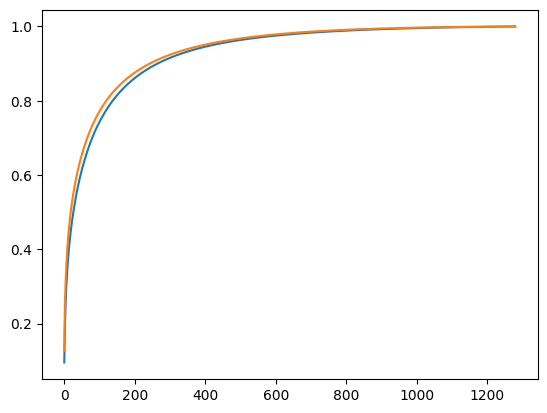

In [16]:
labels = ["EC", "IMT"]
for i, pca in enumerate([pca_ec, pca_ops]):

    plt.plot(np.cumsum(pca.explained_variance_ratio_), label=labels[i])

plt.show()

(array([1.500e+01, 1.155e+03, 8.600e+01, 1.100e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([0.00207483, 0.09049988, 0.17892493, 0.26734999, 0.35577503,
        0.4442001 , 0.53262514, 0.62105018, 0.70947528, 0.79790032,
        0.88632536]),
 <BarContainer object of 10 artists>)

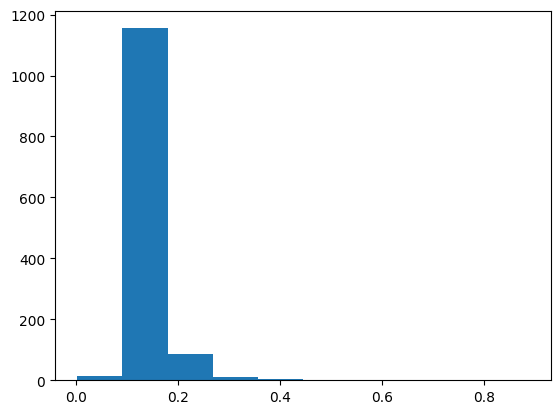

In [23]:
cross_pca_cov = np.max(np.matmul(pca_ec.components_, pca_ops.components_.T), axis=0)

In [25]:
np.cumsum(pca_combo.explained_variance_ratio_)[50]

0.6138834965999571

In [1]:
rank = 500
rank_k_esm_ops = np.matmul(pca_combo.components_, X_ops.T).T[:, :rank]
path = f"/scratch/spn1560/sp_ops_esm_rank_{rank}_X.npy"
np.save(path, rank_k_esm_ops)

NameError: name 'np' is not defined

In [2]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

def construct_sparse_adj_mat(ds_name):
        '''
        Returns sparse representation of sample x feature adjacency matrix
        and lookup of sample names from row idx key.

        Args
            - ds_name: Str name of dataset

        Returns
            -
        '''      
        # Load from dataset "table of contents csv"
        df = pd.read_csv(f"data/{ds_name}/{ds_name}.csv", delimiter='\t')
        df.set_index('Entry', inplace=True)
        sample_idx = {}
        feature_idx = {}
        
        # Construct ground truth protein-function matrix
        print(f"Constructing {ds_name} sparse adjacency matrix")
        row, col, data = [], [], [] # For csr
        for i, elt in enumerate(df.index):
            labels = df.loc[elt, 'Label'].split(';')
            sample_idx[elt] = i
            for label in labels:
                if label in feature_idx:
                    j = feature_idx[label]
                else:
                    j = len(feature_idx)
                    feature_idx[label] = j
                row.append(i)
                col.append(j)
                data.append(1)
                
            print(f"{i}", end='\r')

        adj = sp.sparse.csr_matrix((data, (row, col)), shape=(len(sample_idx), len(feature_idx)))
        idx_sample = {v:k for k,v in sample_idx.items()}
        idx_feature = {v:k for k,v in feature_idx.items()}
            
        return adj, idx_sample, idx_feature

Constructing sp_ops sparse adjacency matrix


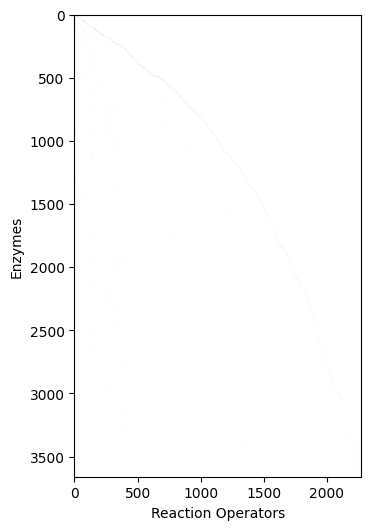

In [3]:
# Visualize sp ops adj mat
train_data_name = 'sp_ops'

y, idx_sample, idx_feature = construct_sparse_adj_mat(train_data_name)
sample_idx = {v:k for k,v in idx_sample.items()}

plt.figure(figsize=(8, 6))
plt.imshow(y.toarray(), cmap='Greys')
plt.ylabel('Enzymes')
plt.xlabel('Reaction Operators')
plt.show()


In [ ]:
idxs = sorted(idx_feature.keys(), key= lambda x : idx_feature[x])
y = y.toarray()
y = y[:, idxs]
plt.figure(figsize=(25,35))
plt.imshow(y, cmap='Greys')
plt.show()
